# Machine Learning Project

## Bank Marketing Data Set

#### DATASET: https://archive.ics.uci.edu/ml/datasets/bank+marketing 

> • Question 

> > 1. What are the factors which are influencing the deals?
> > 2. should the marketing team continue their focus or they should change it
> > 3. Is the marketing result fruitful? 

> • Analysis 

> > We plan to use following models for Analysis
> > > 1. Logistics Regression
> > > 2. Random Forest Classifier
> > > 3. Linear Discriminant Analysis
> > > 4. K Nearest Neighbour

> Data: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed


In [53]:
%matplotlib inline

import os
import numpy as np # importing numpy array
import pandas as pd # importing panda library
import seaborn as sns # importing seaborn, advanced of matplot
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats.stats import pearsonr

pd.options.display.max_rows = 30
sns.set(style='ticks', context='talk')

In [54]:
#read_csv is a function in pandas used to read data from an csv file into a list of DataFrames
tables = pd.read_csv("C:/Users/asher/Desktop/Asher_MS/Sem 2/Machine Learning/Assignments/Project/bank-full.csv",engine="python",index_col=False,sep=';\s*')
tables.head()


,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""balance""""","""""housing""""","""""loan""""","""""contact""""","""""day""""","""""month""""","""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""y"""""""
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""
2,"""33","""""entrepreneur""""","""""married""""","""""secondary""""","""""no""""",2,"""""yes""""","""""yes""""","""""unknown""""",5,"""""may""""",76,1,-1,0,"""""unknown""""","""""no"""""""
3,"""47","""""blue-collar""""","""""married""""","""""unknown""""","""""no""""",1506,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",92,1,-1,0,"""""unknown""""","""""no"""""""
4,"""33","""""unknown""""","""""single""""","""""unknown""""","""""no""""",1,"""""no""""","""""no""""","""""unknown""""",5,"""""may""""",198,1,-1,0,"""""unknown""""","""""no"""""""


# Information about our data

Input variables:
    bank client data:
1. - age (numeric)
2. - job : type of job 
3. - marital : marital status 
4. - education 
5. - default: has credit in default? 
6. - housing: has housing loan? 
7. - loan: has personal loan? 
8. - contact: contact communication type  
9. - month: last contact month of year 
10. - day_of_week: last contact day of the week
11. - duration: last contact duration, in seconds (numeric). 
12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign 
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign 
16. - balance- balance of the customers
17. - deals, whether the calls/marketing resulted in getting a deal for the bank

# Data Cleaning

 1. remove all the " from columns

In [55]:
tables.columns=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','deals']
tables.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,"""58","""""management""""","""""married""""","""""tertiary""""","""""no""""",2143,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",261,1,-1,0,"""""unknown""""","""""no"""""""
1,"""44","""""technician""""","""""single""""","""""secondary""""","""""no""""",29,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",151,1,-1,0,"""""unknown""""","""""no"""""""
2,"""33","""""entrepreneur""""","""""married""""","""""secondary""""","""""no""""",2,"""""yes""""","""""yes""""","""""unknown""""",5,"""""may""""",76,1,-1,0,"""""unknown""""","""""no"""""""
3,"""47","""""blue-collar""""","""""married""""","""""unknown""""","""""no""""",1506,"""""yes""""","""""no""""","""""unknown""""",5,"""""may""""",92,1,-1,0,"""""unknown""""","""""no"""""""
4,"""33","""""unknown""""","""""single""""","""""unknown""""","""""no""""",1,"""""no""""","""""no""""","""""unknown""""",5,"""""may""""",198,1,-1,0,"""""unknown""""","""""no"""""""


In [56]:
tables['age']=tables.age.str.strip('"')
tables['job']=tables.job.str.strip('""')
tables['marital']=tables.marital.str.strip('""')
tables['education']=tables.education.str.strip('""')
tables['default']=tables.default.str.strip('""')
tables['housing']=tables.housing.str.strip('""')
tables['loan']=tables.loan.str.strip('""')
tables['contact']=tables.contact.str.strip('""')
tables['month']=tables.month.str.strip('""')
tables['poutcome']=tables.poutcome.str.strip('""')
tables['deals']=tables.deals.str.strip('""')
tables.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [57]:
tables.shape

(45211, 17)

##### Total rows: 45211
##### Total Columns: 17

##### Checking Data types for all variables:

In [58]:
tables.dtypes

age          object
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deals        object
dtype: object

##### Checking for null values, we see that we do not have any null values in the data

In [59]:
tables.isnull().values.any()

False

##### We have to convert datatype of age from object to numeric

In [60]:
tables['age']=pd.to_numeric(tables['age'])
tables['age'].dtype

dtype('int64')

##### We have no junk values in deals and education column

In [61]:
tables.deals.unique()

array(['no', 'yes'], dtype=object)

In [62]:
tables.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

<b> How many deals were successful? </b>

In [63]:
tables[tables.deals=='yes'].count()[1]

5289

##### Out of 45211 calls made, 5289 deposits were booked. 

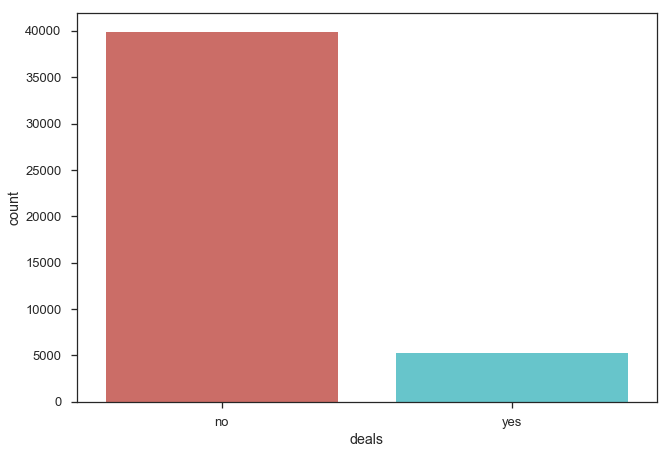

In [64]:
sns.countplot(x='deals',data=tables,palette='hls')

<b> Success rate of the bank marketing? </b>

In [65]:
(5289/45211)*100

11.698480458295547

In [66]:
tables.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As seen from the data, the minimum age is <b>18</b> and the maximum age is <b>95</b>, with mean age being <b>41</b> 
and the balance range is also diverse with person being in debt and earning 100 grands 
</b>

# Data Analysis and Data Distribution

In [67]:
tables.groupby('deals').mean()

,age,balance,day,duration,campaign,pdays,previous
deals,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


## Observations:

>The average age of customers who bought the term deposit is higher than that of the customers who didn’t.

>The pdays (days since the customer was last contacted) is understandably higher for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.

>Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

##### Distriution of balance variable

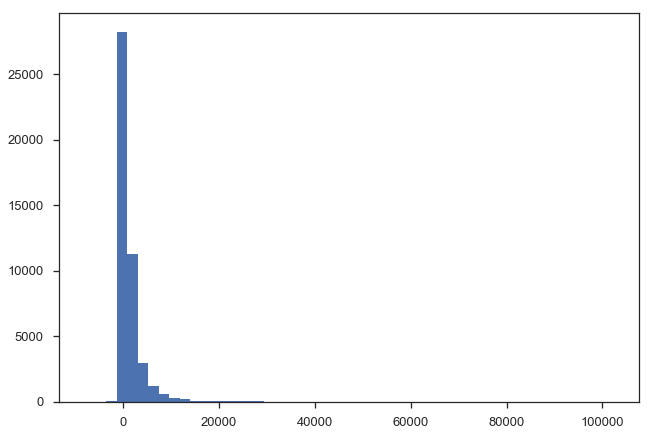

In [68]:
plt.hist(tables.balance,bins=50)
plt.show()

We can see that the data is right skewed.

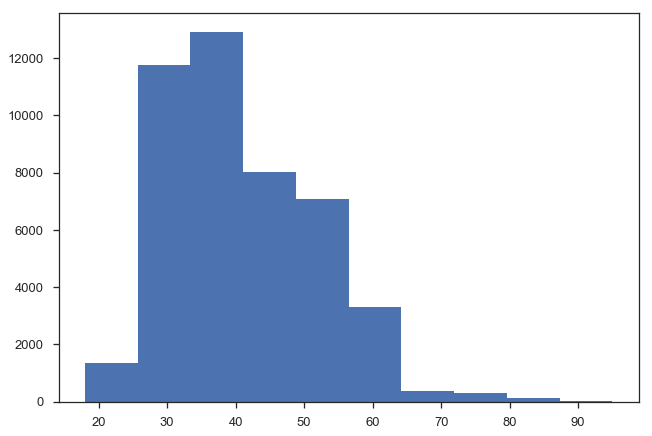

In [69]:
# Distriution of Age variable
plt.hist(tables.age,bins=10)
plt.show()

We see that maximum population is in the age group of 30-60 years 

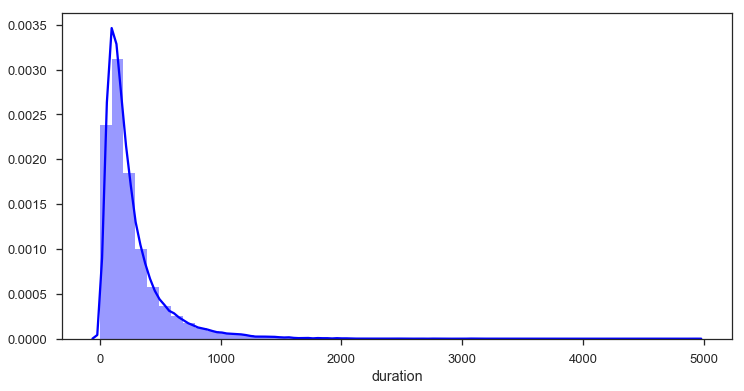

In [70]:
# Distriution of Duration variable
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(tables.duration,color='blue');

Above data tells us that the data is highly skewed to the right

# Outlier Analysis of our predictor variable

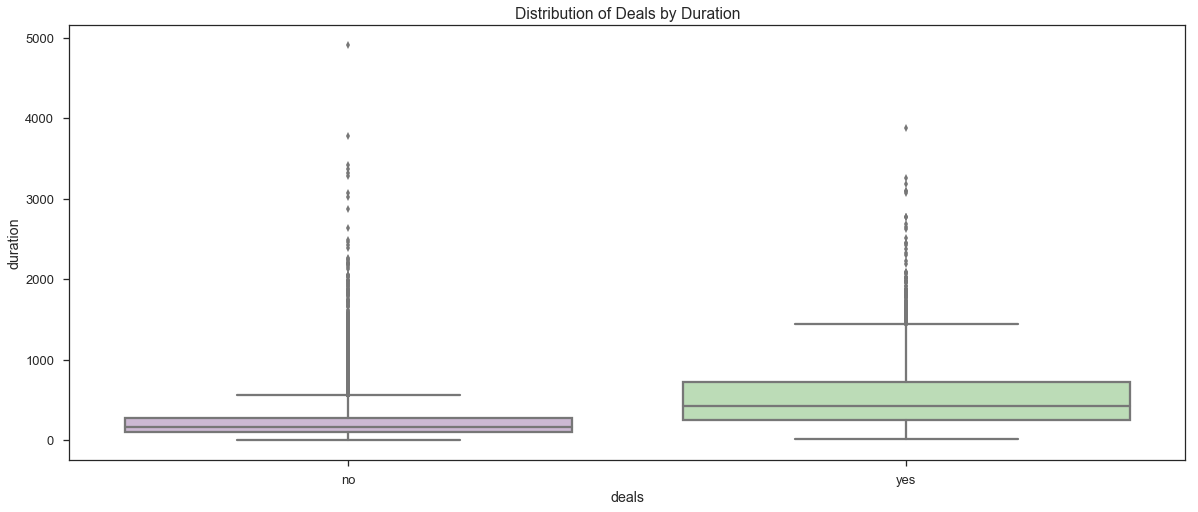

In [71]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="deals", y="duration", data=tables, palette="PRGn")
ax.set_title('Distribution of Deals by Duration')

As we can see from the above graph, the distribution of deals with respect to age doesn't vary much. The duration is high when deals made and vice versa. There are a few outliers too

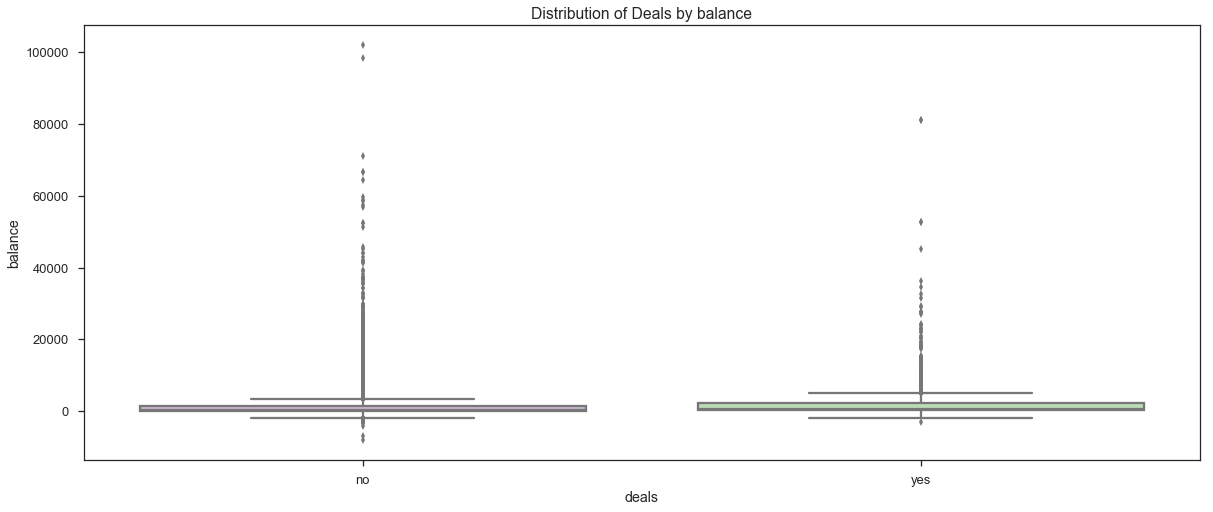

In [72]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="deals", y="balance", data=tables, palette="PRGn")
ax.set_title('Distribution of Deals by balance')

Since our balance variable is highly skewed, above graph doesn't convey any relevant information.

General inference which we can get from this graph is, if the duration is high, then the deals were positive else negative

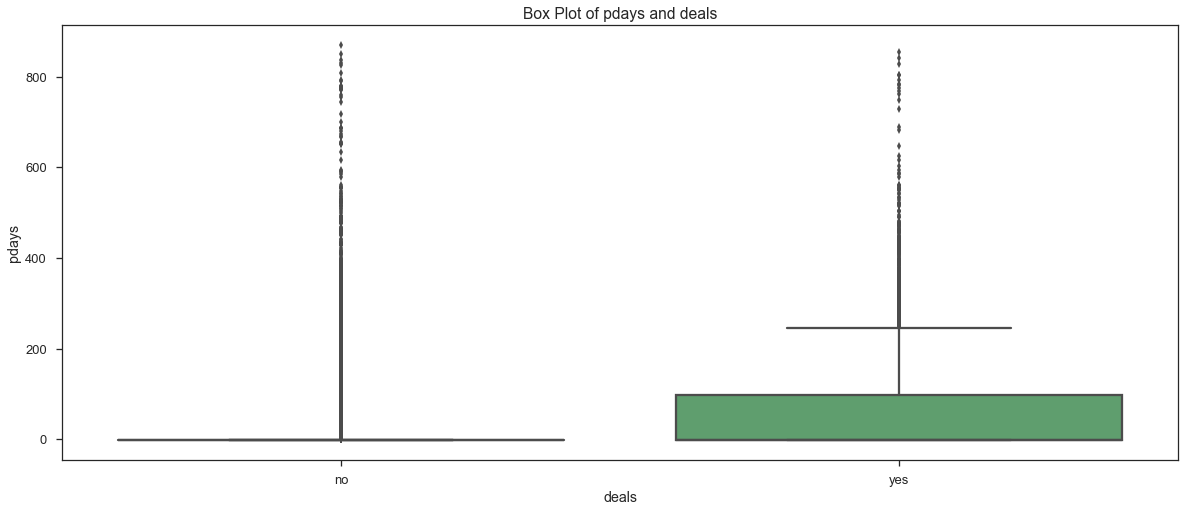

In [73]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(x="deals", y="pdays", data=tables)
ax.set_title('Box Plot of pdays and deals')

We can infer that pdays is high for successful deals

<b>Understading the relations between the variables</b>

C:\Anaconda\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


the corelation between these two variables are:  0.0215603804947


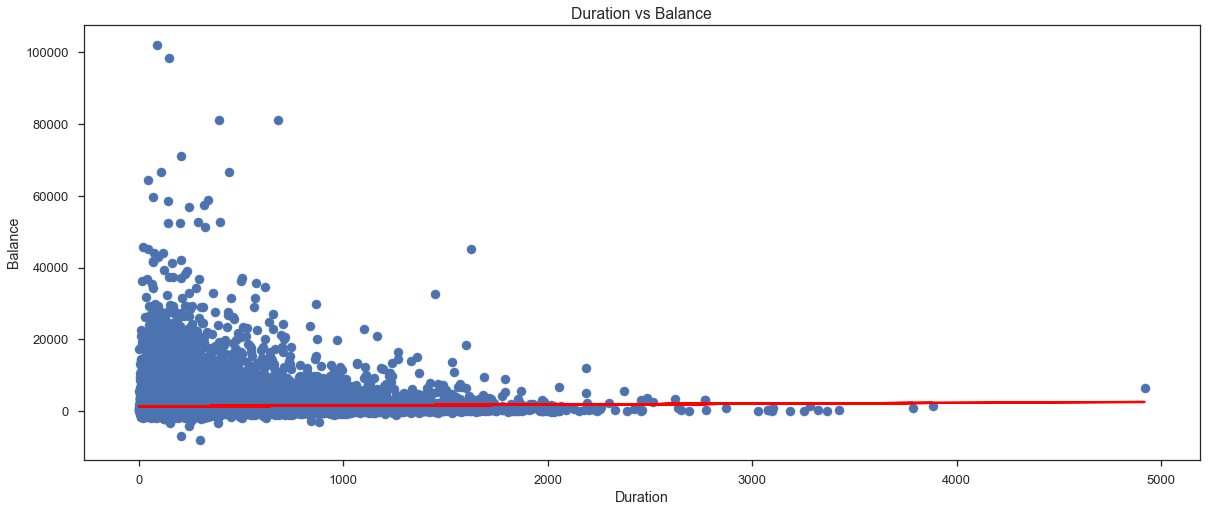

In [74]:
fig, ax = plt.subplots(figsize=(20,8))
fit = np.polyfit(tables.duration,tables.balance, deg=1)
ax.plot(tables.duration, fit[0] * tables.duration + fit[1], color='red')
plt.scatter(tables.duration,tables.balance)
plt.title('Duration vs Balance')
plt.xlabel('Duration')
plt.ylabel('Balance')
fig.show()
print('the corelation between these two variables are: ',pearsonr(tables.duration,tables.balance)[0])

C:\Anaconda\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


the corelation between these two variables are:  0.0215603804947


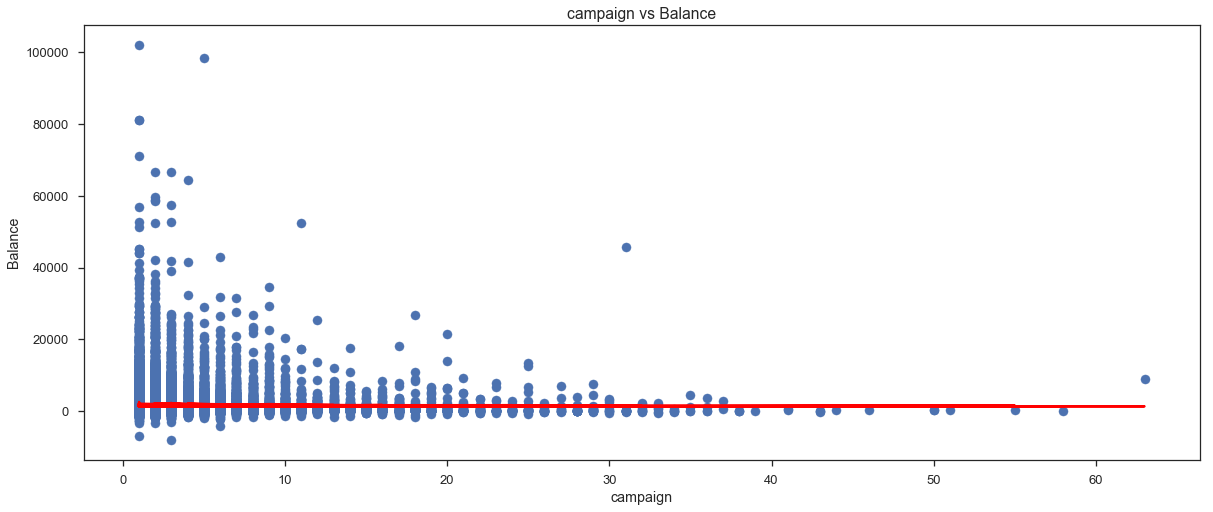

In [75]:
fig, ax = plt.subplots(figsize=(20,8))
fit = np.polyfit(tables.duration,tables.balance, deg=1)
ax.plot(tables.campaign, fit[0] * tables.duration + fit[1], color='red')
plt.scatter(tables.campaign,tables.balance)
plt.title('campaign vs Balance')
plt.xlabel('campaign')
plt.ylabel('Balance')
fig.show()
print('the corelation between these two variables are: ',pearsonr(tables.duration,tables.balance)[0])

 Is job title affecting deals? : Yes! Hence we can say that it is a useful predictor

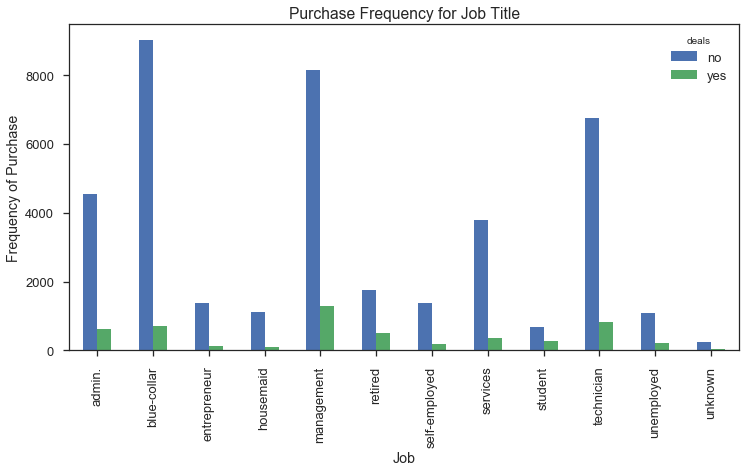

In [76]:
%matplotlib inline

pd.crosstab(tables.job,tables.deals).plot(kind='bar',figsize=(12,6))
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

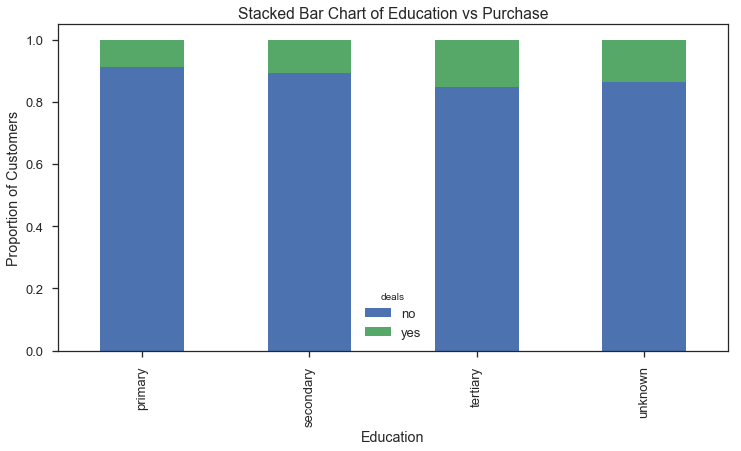

In [77]:
# education affecting

table=pd.crosstab(tables.education,tables.deals)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',figsize=(12,6), stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
#plt.savefig('edu_vs_pur_stack')

 Is Education affecting deals? : Yes! Hence we can say that it is a useful predictor

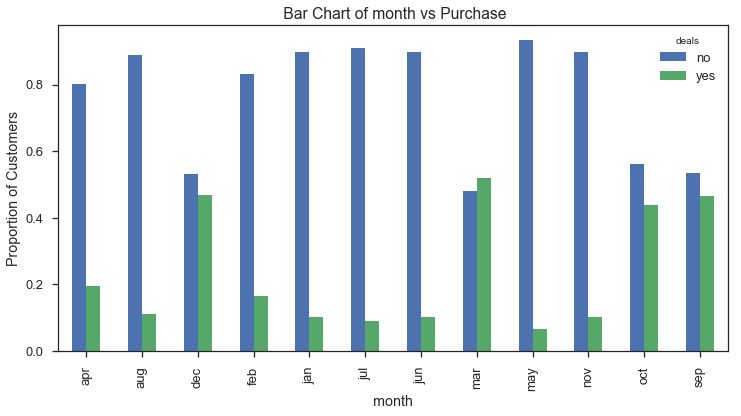

In [78]:
table=pd.crosstab(tables.month,tables.deals)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',figsize=(12,6))
plt.title(' Bar Chart of month vs Purchase')
plt.xlabel('month')
plt.ylabel('Proportion of Customers')
#plt.savefig('edu_vs_pur_stack')

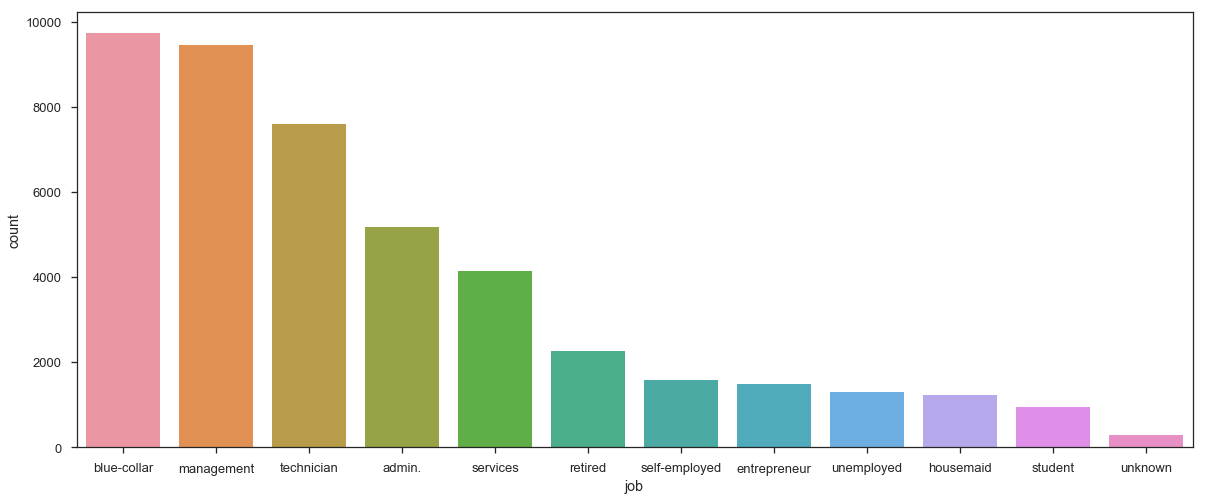

In [79]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot('job',data=tables,order = tables['job'].value_counts().index)

### Data preparation for analysis of model

#### Converting objects to numeric for our model

In [80]:
tables.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [81]:
tables['deals'] = np.where(tables['deals']=='yes', 1, 0)
#tables['default'] = np.where(tables['default']=='yes', 1, 0)
#tables['loan'] = np.where(tables['loan']=='yes', 1, 0)
#tables['housing'] = np.where(tables['housing']=='yes', 1, 0)


In [82]:
new_data=pd.get_dummies(tables)
new_data.head(2)

,age,balance,day,duration,campaign,pdays,previous,deals,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Using Recursive Feature Elimination (RFE) to identify useful predictors

In [83]:
data_column=new_data[new_data.columns.difference(['deals'])]
data_output=new_data['deals']

In [84]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_column, data_output)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False False False False False
 False False False  True False False False False False False False False
  True False False False False  True False False False False  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True False]
[32 34 16  3 13  1 29 12  8 31  5  9 23 10 20  1 26 19 11  6 25  2 22 21  1
 24  7 14 30  1 17  4 27 18  1  1  1  1  1 15  1  1  1  1  1 33  1  1  1  1
 28]


In [85]:
b=data_column.columns
a=rfe.support_
c=pd.DataFrame(a,index=b)
c=c[c[0]==True]

### Final columns to be used in our model are:


In [86]:
c.index

Index(['contact_unknown', 'housing_yes', 'job_student', 'loan_yes',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# Questions to our data

<b>
1. What are the factors which are influencing the deals?
2. should the marketing team continue their focus or they should change it
3. Is the marketing result fruitful? 
</b>

Machine learning models
1. Logistics Regression
2. Random Forest Classifier
3. Linear Discriminant Analysis
4. K Nearest Neighbour

#### References:

> DATASET: https://archive.ics.uci.edu/ml/datasets/bank+marketing

> Dr Patrick Shafto

> http://scikit-learn.org/stable/modules/neighbors.html

> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
